<a href="https://colab.research.google.com/github/pv1995/DM-Assignment4/blob/main/Assignment4_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import requests
import pandas as pd
import random as rd
import math

In [2]:
# Question 1 - part a

In [3]:
url = "https://course.ccs.neu.edu/cs6220/homework-4/data/f150_motor_distributors.txt"

In [4]:
response = requests.get(url)
data = response.text
lines = data.split("\n")
df = pd.DataFrame([line.split(",") for line in lines])
df.columns = ["timing_speed", "coil_gap"]
df.drop(df.tail(1).index,inplace=True)
df = df.astype(float)
df


,timing_speed,coil_gap
0,-11.969996,-8.039628
1,-26.961416,-6.962109
2,-12.915849,-1.378941
3,22.476144,2.066612
4,-13.146631,4.835322
...,...,...
4995,6.852668,1.549076
4996,-2.340729,-7.343469
4997,12.925503,-0.103197
4998,-34.336778,4.405753


In [5]:
X = df.iloc[:, [0, 1]].values
X.shape
X[1]

array([-26.96141582,  -6.96210943])

In [6]:
m=X.shape[0] 
n=X.shape[1]

In [7]:
x1 = np.array([10.0, 10.0])
x2 = np.array([-10.0, -10.0])
x3 = np.array([2.0, 2.0])
x4 = np.array([3.0, 3.0])
x5 = np.array([-3.0, -3.0])

In [8]:
def euclidean_distance(p, q):
    return math.sqrt((p[0] - q[0]) ** 2 + (p[1] - q[1]) ** 2)

def k_means_clustering(data, k, iterations):
    n = data.shape[0]
    centroids = np.array([x1, x2, x3, x4, x5])
    for i in range(iterations):
        clusters = [[] for _ in range(k)]
        for i in range(n):
            distances = [euclidean_distance(data[i], centroid) for centroid in centroids]
            nearest_centroid_index = distances.index(min(distances))
            clusters[nearest_centroid_index].append(i)

        for j in range(k):
            if len(clusters[j]) > 0:
                centroids[j] = [sum(point[0] for point in data[clusters[j]]) / len(clusters[j]),
                                sum(point[1] for point in data[clusters[j]]) / len(clusters[j])]

    return centroids, clusters

k = 5
iterations = 100
centroids, clusters = k_means_clustering(X, k, iterations)
print("Final centroids:", centroids)
for i, cluster in enumerate(clusters):
    print(f"Cluster {i+1}:", cluster)


Final centroids: [[ 27.26677403  -1.08848482]
 [-32.27032272   2.65984149]
 [ -1.45401192  -2.23932918]
 [ 11.48737759  -1.70898344]
 [-15.05895772  -0.47281415]]
Cluster 1: [3, 5, 9, 14, 17, 20, 56, 63, 64, 68, 80, 84, 94, 102, 117, 125, 131, 138, 141, 142, 165, 175, 176, 185, 196, 200, 204, 205, 211, 221, 225, 246, 267, 273, 279, 288, 298, 300, 301, 330, 338, 344, 350, 363, 382, 395, 410, 420, 421, 425, 429, 434, 446, 447, 448, 449, 451, 453, 456, 466, 469, 473, 483, 485, 493, 501, 504, 512, 519, 536, 537, 544, 553, 559, 561, 580, 596, 608, 633, 636, 655, 659, 661, 663, 674, 678, 686, 688, 693, 694, 699, 704, 709, 719, 723, 749, 752, 763, 764, 767, 772, 797, 798, 799, 803, 809, 810, 822, 826, 831, 857, 858, 861, 882, 890, 895, 899, 905, 906, 909, 914, 918, 922, 944, 947, 953, 963, 967, 973, 984, 987, 988, 999, 1000, 1006, 1020, 1026, 1030, 1039, 1049, 1053, 1054, 1078, 1087, 1094, 1106, 1142, 1150, 1165, 1178, 1182, 1186, 1195, 1202, 1204, 1211, 1222, 1223, 1229, 1247, 1254, 1257, 12

In [9]:
# Question 1 - part b

In [10]:
import matplotlib.pyplot as plt

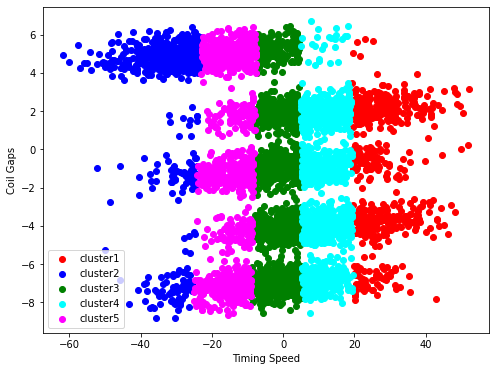

In [11]:
colors=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
plt.figure(figsize=(8, 6))

for i, cluster in enumerate(clusters):
    plt.scatter(X[cluster, 0], X[cluster, 1], color = colors[i],label=labels[i])
# plt.scatter(centroids[0,:],centroids[1,:], s=300,c='black')
plt.xlabel('Timing Speed')
plt.ylabel('Coil Gaps')
plt.legend()
plt.show()

In [12]:
# Question 1 - part c

5 seems like a logical initialization because from the graph above it is clear that the data can be grouped into 5 unique clusters. The clustering isn't good enough though because the points from different clusters should fall in different clusters but in our case the points are spread across all 5 clusters. 

In [13]:
# Question 2 - part a

In [14]:
import numpy as np

def mahalanobis_distance(X, Y, P):
    diff = X - Y
    cov_inv = np.dot(P.T, P)
    cov_inv = np.linalg.inv(cov_inv)
    return np.sqrt(np.dot(np.dot(diff.T, cov_inv), diff))

def k_means_mahalanobis(data, k, P, max_iterations):
    n = data.shape[0]
    centroids = np.array([x1, x2, x3, x4, x5])
    for i in range(max_iterations):
        clusters = [[] for _ in range(k)]
        for j in range(n):
            distances = [mahalanobis_distance(data[j], centroids[c], P) for c in range(k)]
            cluster = np.argmin(distances)
            clusters[cluster].append(j)
        old_centroids = centroids.copy()
        for c in range(k):
            if clusters[c]:
                centroids[c] = np.mean(data[clusters[c]], axis=0)
    return clusters, centroids

k = 5
P = np.array([[10.0, 0.5], [-10.0, 0.25]])
max_iterations = 100
clusters, centroids = k_means_mahalanobis(X, k, P, max_iterations)
print("Clusters:", clusters)
print("Centroids:", centroids)


Clusters: [[4, 12, 19, 22, 25, 30, 32, 35, 40, 43, 52, 54, 60, 66, 87, 90, 93, 94, 95, 99, 112, 127, 133, 143, 154, 159, 164, 168, 171, 180, 190, 191, 192, 197, 203, 208, 215, 216, 231, 233, 239, 240, 241, 242, 248, 249, 253, 260, 272, 274, 282, 283, 284, 285, 295, 297, 305, 306, 307, 312, 318, 319, 322, 323, 332, 333, 336, 337, 341, 342, 348, 349, 351, 358, 362, 363, 368, 372, 373, 385, 386, 391, 393, 396, 400, 412, 418, 419, 423, 424, 428, 430, 436, 443, 444, 445, 450, 458, 460, 462, 465, 477, 479, 498, 500, 523, 554, 557, 560, 564, 566, 567, 569, 578, 581, 583, 597, 603, 611, 619, 622, 625, 626, 628, 630, 634, 644, 645, 652, 660, 662, 664, 666, 668, 670, 673, 677, 690, 701, 713, 714, 715, 721, 731, 735, 766, 771, 775, 779, 783, 786, 788, 794, 801, 815, 818, 827, 834, 838, 845, 846, 852, 853, 863, 872, 873, 875, 878, 885, 888, 891, 892, 896, 911, 912, 913, 925, 928, 930, 933, 939, 941, 959, 964, 974, 975, 993, 997, 1002, 1008, 1012, 1019, 1022, 1032, 1036, 1038, 1040, 1041, 1045, 104

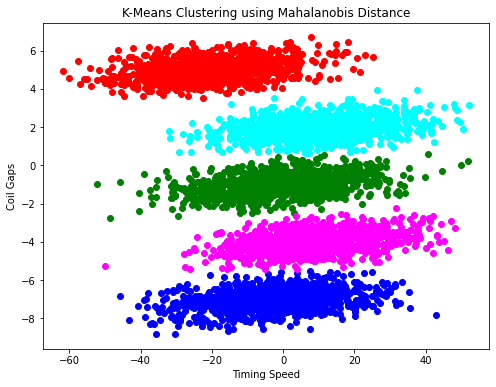

In [15]:
colors=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
plt.figure(figsize=(8, 6))
for i, cluster in enumerate(clusters):
    plt.scatter(X[cluster, 0], X[cluster, 1], color = colors[i],label=labels[i])
plt.title("K-Means Clustering using Mahalanobis Distance")
plt.xlabel('Timing Speed')
plt.ylabel('Coil Gaps')
plt.show()

In [16]:
# Question 2 - part b

In [17]:
df_centered = df - df.mean()
covariance_matrix = np.cov(df_centered.T)
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
k = 2 
principal_components = sorted_eigenvectors[:, :k]
print(principal_components)

[[ 0.99838317  0.05684225]
 [-0.05684225  0.99838317]]


In [18]:
# Question 2 - part c

In [19]:
X[cluster == 1]

array([], shape=(0, 5000, 2), dtype=float64)

In [20]:
for i, cluster in enumerate(clusters):
  if len(cluster) > 0:
      centered = X[cluster] - X[cluster].mean()
      cov = np.cov(centered.T)
      # cov = np.cov(X[cluster])
      eig_vals, eig_vecs = np.linalg.eig(cov)
      idx = np.argsort(eig_vals)[::-1]
      sorted_eig_vecs = eig_vecs[:, idx]
      k = 2 
      principal_components = sorted_eig_vecs[:, :k]
  print(i+1,") \n",principal_components)
  


1 ) 
 [[ 0.99993527 -0.01137789]
 [ 0.01137789  0.99993527]]
2 ) 
 [[ 0.99992533 -0.01222027]
 [ 0.01222027  0.99992533]]
3 ) 
 [[ 0.99990986 -0.01342629]
 [ 0.01342629  0.99990986]]
4 ) 
 [[ 0.99993306 -0.01157047]
 [ 0.01157047  0.99993306]]
5 ) 
 [[ 0.99989374 -0.01457781]
 [ 0.01457781  0.99989374]]


In [21]:
# Question 2 - part d

In [22]:
A, B = np.linalg.eig(P.T)

P_prime = np.dot(A, B.T).T

# Print the result
print("Original matrix P:")
print(P)
print("New matrix P':")
print(P_prime)

Original matrix P:
[[ 10.     0.5 ]
 [-10.     0.25]]
New matrix P':
[10.02645889  1.04999268]


The matrix P' that we obtain through eigenvector/eigenvalue decomposition and matrix multiplication, P' = ΛΦ, is a transformed version of the original data matrix P. Specifically, it is a linear transformation of the data that is designed to extract the most important features (or principal components) of the data.

The matrix Φ contains the eigenvectors of the covariance matrix of the data, and the diagonal matrix Λ contains the corresponding eigenvalues. The eigenvectors are directions in the feature space that capture the most variation in the data, and the eigenvalues represent the amount of variation along those directions.

Multiplying P by Φ rotates the data matrix so that its principal axes align with the eigenvectors. Multiplying the result by Λ scales the rotated data along each principal axis by the corresponding eigenvalue. The resulting matrix P' has the same dimensions as P but its columns are transformed such that they represent the principal components of the data.

In summary, the matrix P' represents the transformed data matrix with the principal components extracted. It can be used for visualization, feature selection, or dimensionality reduction purposes.

In [23]:
# Question 3 - part a

In [24]:
from itertools import combinations

In [25]:
freq_3_itemsets = [
    {1, 2, 3},
    {1, 2, 4},
    {1, 2, 5},
    {1, 3, 4},
    {2, 3, 4},
    {2, 3, 5},
    {3, 4, 5}
]


freq_1_itemsets = [{1}, {2}, {3}, {4}, {5}]


pairs = [(s1 | s2) for s1 in freq_3_itemsets for s2 in freq_1_itemsets if not s1 & s2]

freq_4_itemsets = [s for s in combinations(set().union(*pairs), 4)]

print(freq_4_itemsets)


[(1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 4, 5), (1, 3, 4, 5), (2, 3, 4, 5)]


In [26]:
# Question 3 - part b

In [27]:
def generate_candidates(frequent_itemsets):
    candidates = set()
    for itemset1 in frequent_itemsets:
        for itemset2 in frequent_itemsets:
            if itemset1 != itemset2 and len(itemset1.union(itemset2)) == 4 or len(itemset1.intersection(itemset2)) == 4 and list(itemset1)[-1] < list(itemset2)[-1]:
                candidate = itemset1.union(itemset2)
                # print(candidate)
                candidates.add(tuple(candidate))

    return candidates


In [28]:
frequent_3_itemsets = [
    {1, 2, 3},
    {1, 2, 4},
    {1, 2, 5},
    {1, 3, 4},
    {2, 3, 4},
    {2, 3, 5},
    {3, 4, 5}
]

candidate_4_itemsets = generate_candidates(frequent_3_itemsets)
print("Candidate 4-itemsets:", candidate_4_itemsets)

frequent_4_itemsets = set()
for itemset in candidate_4_itemsets:
    is_frequent = False
    for subset in itemset:
    
        if set(itemset).difference({subset}) not in frequent_3_itemsets:
            is_frequent = True
            break
    if is_frequent:
        frequent_4_itemsets.add(itemset)

print("Frequent 4-itemsets:", frequent_4_itemsets)



Candidate 4-itemsets: {(1, 3, 4, 5), (1, 2, 3, 5), (1, 2, 3, 4), (2, 3, 4, 5), (1, 2, 4, 5)}
Frequent 4-itemsets: {(1, 2, 3, 5), (1, 3, 4, 5), (1, 2, 4, 5), (2, 3, 4, 5)}


In [29]:
# Question 3 - part c

In [30]:
from collections import defaultdict

In [31]:
min_support = 4
freq_3_itemsets = [
    {1, 2, 3},
    {1, 2, 4},
    {1, 2, 5},
    {1, 3, 4},
    {2, 3, 4},
    {2, 3, 5},
    {3, 4, 5}
]
# Create a list of all candidate 1-itemsets
all_items = set(item for transaction in freq_3_itemsets for item in transaction)

candidate_4_itemsets = list(combinations(all_items, 4))

support_counts = defaultdict(int)
for transaction in freq_3_itemsets:
    for candidate_set in candidate_4_itemsets:
        if set(transaction).issubset(candidate_set):
            support_counts[candidate_set] += 1

frequent_4_itemsets = [itemset for itemset in support_counts if support_counts[itemset] >= min_support]


In [32]:
print(frequent_4_itemsets)

[(1, 2, 3, 4)]


In [33]:
# Question 4 - part a

There are six items in the data set. Therefore the total number of rules is 602.

In [34]:
# Question 4 - part b

To find the confidence of the rule {Milk, Diapers} ⇒ {Butter}, we need to calculate the support and confidence of both the antecedent {Milk, Diapers} and the consequent {Butter}, as follows:
*   The support of {Milk, Diapers} is the number of transactions containing both Milk and Diapers, which is 3 (transactions 2, 3, and 7).
*   The support of {Milk, Diapers, Butter} is the number of transactions containing all three items, which is 2 (transactions 2 and 7).
*   The confidence of the rule {Milk, Diapers} ⇒ {Butter} is the ratio of the support of the itemset {Milk, Diapers, Butter} to the support of the itemset {Milk, Diapers}, which is 2/3, or 0.67 (rounded to two decimal places).

Therefore, the confidence of the rule {Milk, Diapers} ⇒ {Butter} is **0.67, or 67%**.


In [35]:
# Question 4 - part c

The support for the rule {Milk, Diapers} ⇒ {Butter} is the number of transactions that contain both "Milk" and "Diapers" as well as "Butter".
From the given table, we can see that there are 3 transactions that contain both "Milk" and "Diapers" (transactions 2, 3, and 7).
Out of these 3 transactions, 2 also contain "Butter" (transactions 2 and 7).
Therefore, the support for the rule {Milk, Diapers} ⇒ {Butter} is **2**.


In [36]:
# Question 4 - part d

**True**

If {a,b,c,d} is a frequent itemset, then it means that the support count of {a,b,c,d} is greater than or equal to the minimum support threshold. Since {a,b} is a subset of {a,b,c,d}, it follows that the support count of {a,b} is less than or equal to the support count of {a,b,c,d}.
Therefore, if {a,b,c,d} is a frequent itemset, {a,b} is also a frequent itemset, since its support count is at least as large as that of {a,b,c,d} and hence is also greater than or equal to the minimum support threshold.


In [37]:
# Question 4 - part e

**True**

If {a,b}, {b,c} and {a,c} are frequent itemsets, then it means that their respective support counts are greater than or equal to the minimum support threshold. Since {a,b,c} is a superset of {a,b}, {b,c} and {a,c}, it follows that the support count of {a,b,c} is at least as large as the smallest support count among the support counts of {a,b}, {b,c} and {a,c}.
Therefore, if {a,b}, {b,c} and {a,c} are frequent itemsets, {a,b,c} is also a frequent itemset, since its support count is at least as large as the minimum support threshold.


In [38]:
# Question 4 - part f

**False**

We cannot determine whether the support of {b} is between 20 and 30, or greater than or equal to 30 or less than or equal to 20 based solely on the information provided about the support of {a,b} and {b,c}.
It is possible for {b} to have a support count of 20, which would be the same as the support count of {a,b}, in which case the statement would be false. It is also possible for {b} to have a support count of 30, which would be the same as the support count of {b,c}, in which case the statement would be false. Finally, it is possible for {b} to have a support count that is greater than or equal to 30 or less than or equal to 20, in which case the statement would be true.
Therefore, the truth value of the statement cannot be determined based on the given information.


In [39]:
# Question 4 - part g

**False**

The maximum number of size-2 frequent itemsets that can be extracted from a dataset with 5 items is actually 10.
To see why, consider that a size-2 frequent itemset consists of two distinct items. In a dataset with 5 items, there are 5 choices for the first item and 4 choices for the second item (since the second item cannot be the same as the first). However, we must divide this by 2 to correct for overcounting since {a, b} is the same as {b, a}. Therefore, the total number of distinct size-2 itemsets is 5*4/2 = 10.
Therefore, the statement is false.


In [40]:
# Question 4 - part h

                  Ø
                 / \
                /   \
               a     b
               |\   /|
               | \ / |
               |  X  |
               | / \ |
               |/   \|
               c     ab
               |\   /|
               | \ / |
               |  X  |
               | / \ |
               |/   \|
               bc    ac
               |\   /|
               | \ / |
               |  X  |
               | / \ |
               |/   \|
               abc

In this lattice, the nodes represent itemsets, with the empty set at the top and the set of all items at the bottom. The edges between nodes indicate subset relationships. For example, the node for {a} has edges to the nodes for the empty set and {a,b}, since {a} is a subset of both of those sets. Similarly, the node for {ab} has edges to the nodes for {a}, {b}, and {abc}, since {ab} is a subset of all of those sets.
